# 📊 Height Prediction Project

## Project Overview
This project predicts **Height** based on **Age** using two regression algorithms:
1. **Linear Regression** - Simple linear relationship
2. **Decision Tree Regression** - Non-linear pattern recognition

We will compare both models using **R² Score** and perform predictions on new data.

## 📚 Step 1: Import Required Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 📂 Step 2: Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

print("📊 Dataset loaded successfully!\n")
print(f"Dataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}\n")

print("First 5 rows:")
df.head()

📊 Dataset loaded successfully!

Dataset Shape: (71, 2)
Total Records: 71
Total Features: 2

First 5 rows:


,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


In [3]:
# Display last 5 rows
print("Last 5 rows:")
df.tail()

Last 5 rows:


,Age,Height
66,76,204
67,77,205
68,78,206
69,79,207
70,80,208


In [4]:
# Dataset information
print("📋 Dataset Information:")
df.info()

📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [5]:
# Check for missing values
print("🔍 Missing Values:")
print(df.isnull().sum())
print(f"\n✅ Total Missing Values: {df.isnull().sum().sum()}")

🔍 Missing Values:
Age       0
Height    0
dtype: int64

✅ Total Missing Values: 0


In [6]:
# Statistical summary
print("📊 Statistical Summary:")
df.describe()

📊 Statistical Summary:


,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


## 📈 Step 3: Data Visualization

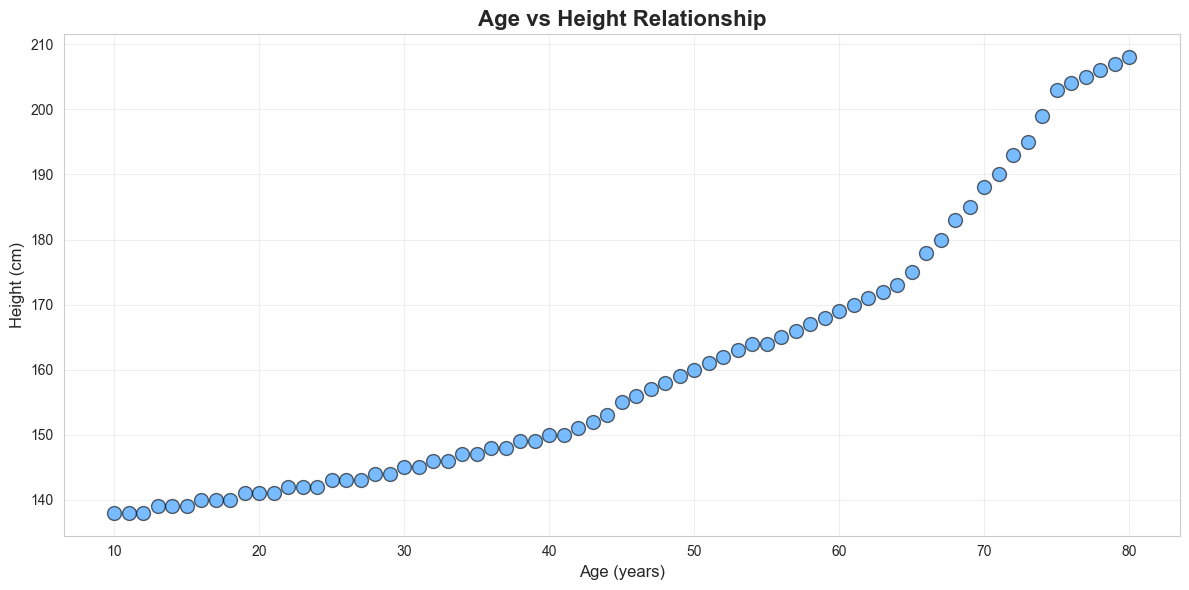

✅ Scatter plot shows the relationship between Age and Height


In [7]:
# Scatter plot: Age vs Height
plt.figure(figsize=(12, 6))
plt.scatter(df['Age'], df['Height'], color='dodgerblue', alpha=0.6, s=100, edgecolors='black')
plt.title('Age vs Height Relationship', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Height (cm)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Scatter plot shows the relationship between Age and Height")

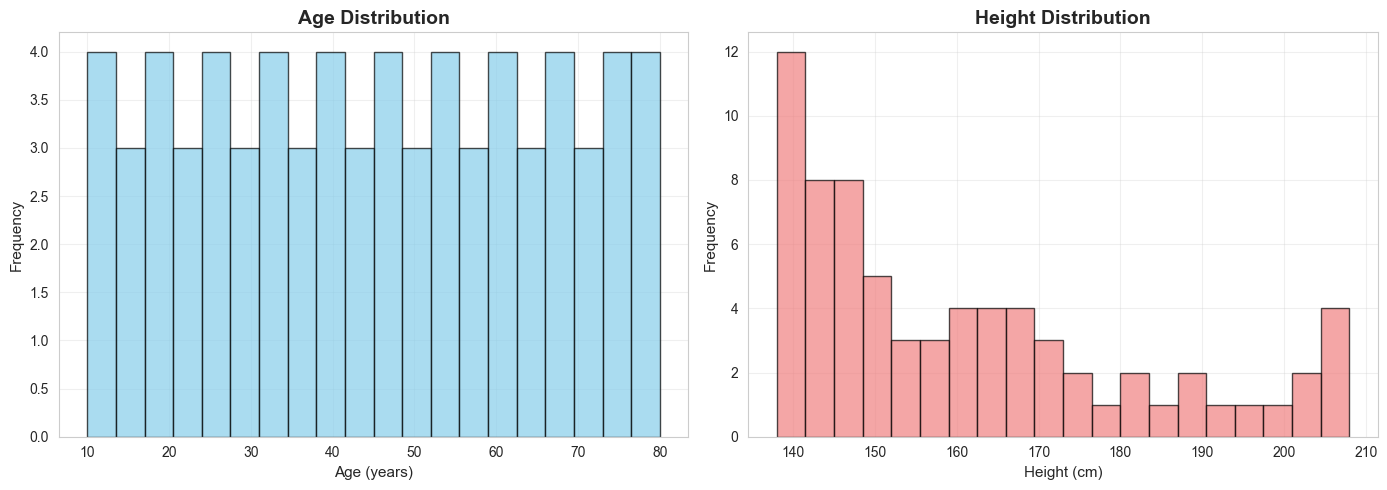

✅ Distribution plots displayed


In [8]:
# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age distribution
axes[0].hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age (years)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Height distribution
axes[1].hist(df['Height'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Height Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Height (cm)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Distribution plots displayed")

🔗 Correlation Matrix:
             Age    Height
Age     1.000000  0.947283
Height  0.947283  1.000000


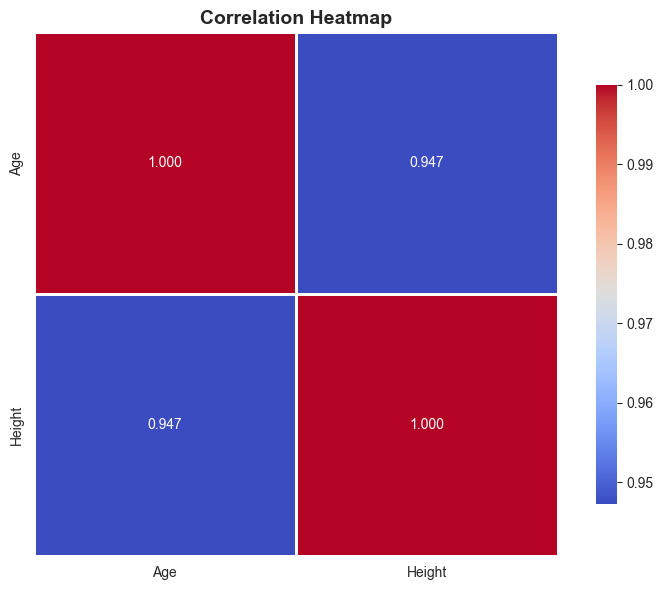


📊 Correlation between Age and Height: 0.947


In [9]:
# Correlation analysis
correlation = df.corr()
print("🔗 Correlation Matrix:")
print(correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.3f', linewidths=2, 
            square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n📊 Correlation between Age and Height: {correlation.iloc[0, 1]:.3f}")

## 🔧 Step 4: Data Preprocessing

In [10]:
# Prepare features (X) and target (y)
X = df[['Age']].values  # Features - Age
y = df['Height'].values  # Target - Height

print("✅ Features and Target prepared")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

✅ Features and Target prepared
Features (X) shape: (71, 1)
Target (y) shape: (71,)


In [11]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split into training and testing sets\n")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

✅ Data split into training and testing sets

Training set size: 56 samples (78.9%)
Testing set size: 15 samples (21.1%)

X_train shape: (56, 1)
X_test shape: (15, 1)
y_train shape: (56,)
y_test shape: (15,)


## 🤖 Step 5: Linear Regression Model

In [12]:
# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("✅ Linear Regression Model Trained Successfully!\n")
print(f"Coefficient (Slope): {lr_model.coef_[0]:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")
print(f"\nEquation: Height = {lr_model.coef_[0]:.4f} × Age + {lr_model.intercept_:.4f}")

✅ Linear Regression Model Trained Successfully!

Coefficient (Slope): 1.0143
Intercept: 115.0967

Equation: Height = 1.0143 × Age + 115.0967


In [13]:
# Make predictions on test set
y_pred_lr = lr_model.predict(X_test)

# Calculate R² score
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("📊 Linear Regression Model Performance:")
print("="*50)
print(f"R² Score: {r2_lr:.4f} ({r2_lr*100:.2f}%)")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f} cm")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f} cm")
print("="*50)

📊 Linear Regression Model Performance:
R² Score: 0.8103 (81.03%)
Mean Absolute Error (MAE): 6.2122 cm
Mean Squared Error (MSE): 47.3785
Root Mean Squared Error (RMSE): 6.8832 cm


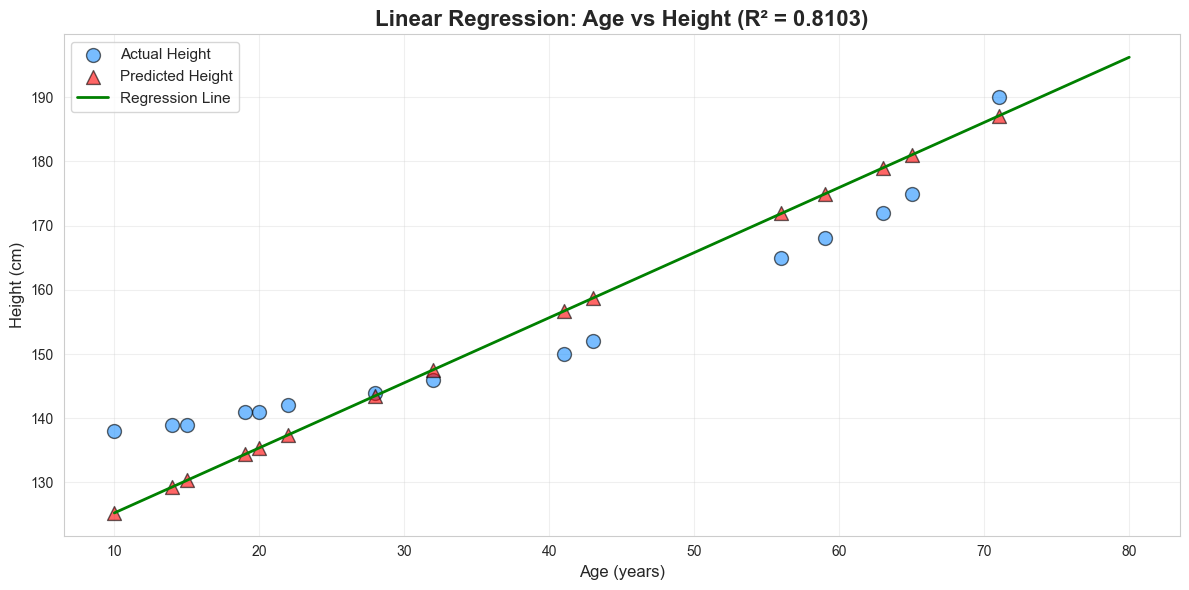

In [14]:
# Visualize Linear Regression predictions
plt.figure(figsize=(12, 6))

# Scatter plot of actual values
plt.scatter(X_test, y_test, color='dodgerblue', label='Actual Height', s=100, alpha=0.6, edgecolors='black')

# Scatter plot of predicted values
plt.scatter(X_test, y_pred_lr, color='red', label='Predicted Height', s=100, alpha=0.6, marker='^', edgecolors='black')

# Plot regression line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = lr_model.predict(X_range)
plt.plot(X_range, y_range, color='green', linewidth=2, label='Regression Line')

plt.title(f'Linear Regression: Age vs Height (R² = {r2_lr:.4f})', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Height (cm)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

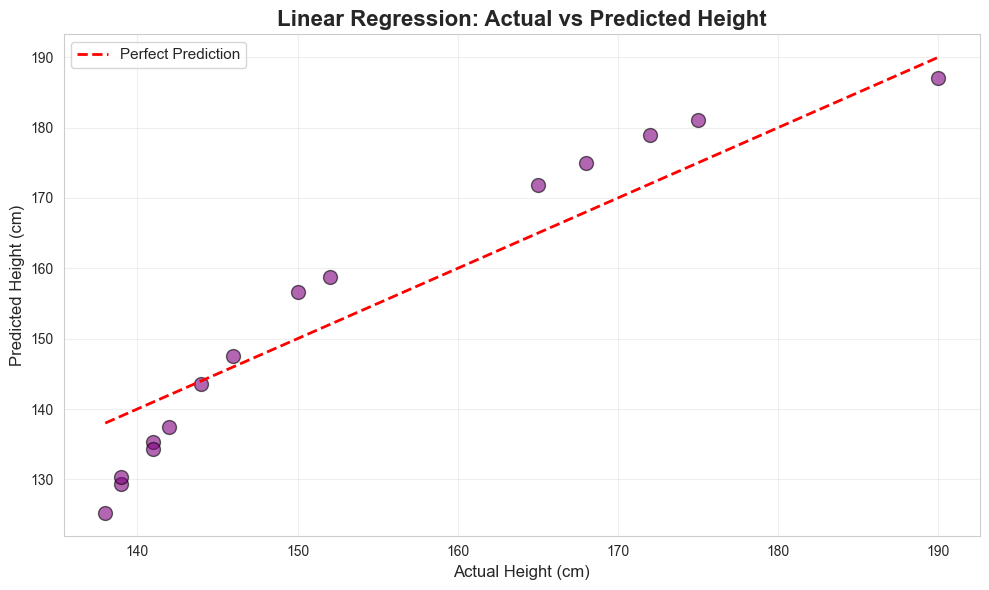

In [15]:
# Actual vs Predicted comparison for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='purple', alpha=0.6, s=100, edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Linear Regression: Actual vs Predicted Height', fontsize=16, fontweight='bold')
plt.xlabel('Actual Height (cm)', fontsize=12)
plt.ylabel('Predicted Height (cm)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 🌳 Step 6: Decision Tree Regression Model

In [16]:
# Create and train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

print("✅ Decision Tree Regression Model Trained Successfully!\n")
print(f"Max Depth: {dt_model.get_depth()}")
print(f"Number of Leaves: {dt_model.get_n_leaves()}")
print(f"Number of Features: {dt_model.n_features_in_}")

✅ Decision Tree Regression Model Trained Successfully!

Max Depth: 7
Number of Leaves: 45
Number of Features: 1


In [17]:
# Make predictions on test set
y_pred_dt = dt_model.predict(X_test)

# Calculate R² score
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print("📊 Decision Tree Regression Model Performance:")
print("="*50)
print(f"R² Score: {r2_dt:.4f} ({r2_dt*100:.2f}%)")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f} cm")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f} cm")
print("="*50)

📊 Decision Tree Regression Model Performance:
R² Score: 0.9955 (99.55%)
Mean Absolute Error (MAE): 0.8667 cm
Mean Squared Error (MSE): 1.1333
Root Mean Squared Error (RMSE): 1.0646 cm


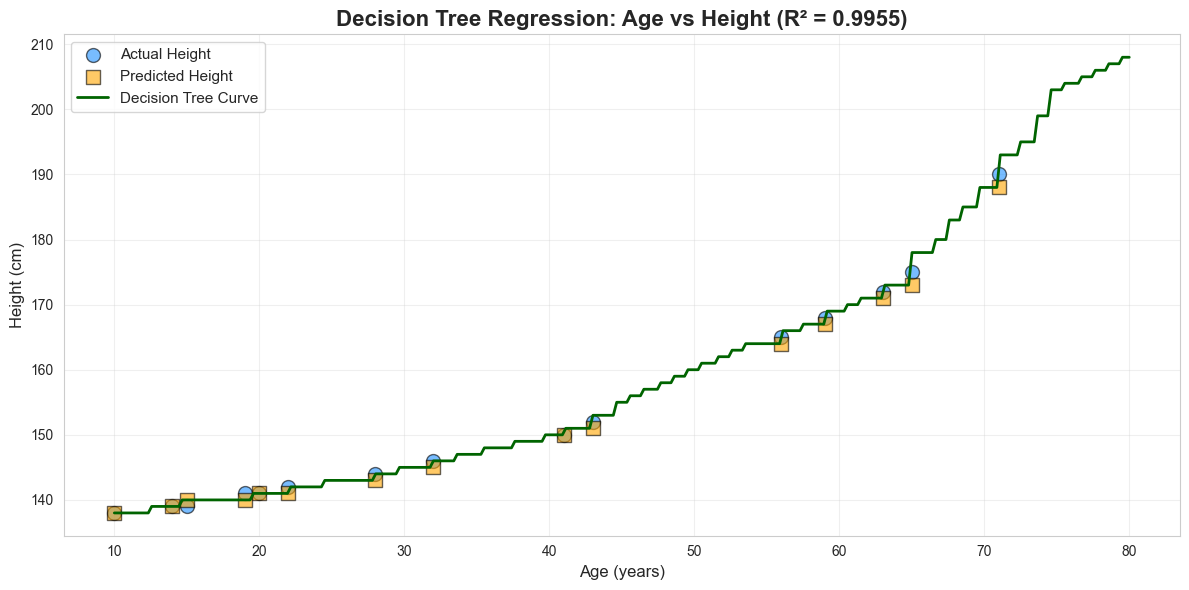

In [18]:
# Visualize Decision Tree Regression predictions
plt.figure(figsize=(12, 6))

# Scatter plot of actual values
plt.scatter(X_test, y_test, color='dodgerblue', label='Actual Height', s=100, alpha=0.6, edgecolors='black')

# Scatter plot of predicted values
plt.scatter(X_test, y_pred_dt, color='orange', label='Predicted Height', s=100, alpha=0.6, marker='s', edgecolors='black')

# Plot decision tree prediction curve
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_range_dt = dt_model.predict(X_range)
plt.plot(X_range, y_range_dt, color='darkgreen', linewidth=2, label='Decision Tree Curve')

plt.title(f'Decision Tree Regression: Age vs Height (R² = {r2_dt:.4f})', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Height (cm)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

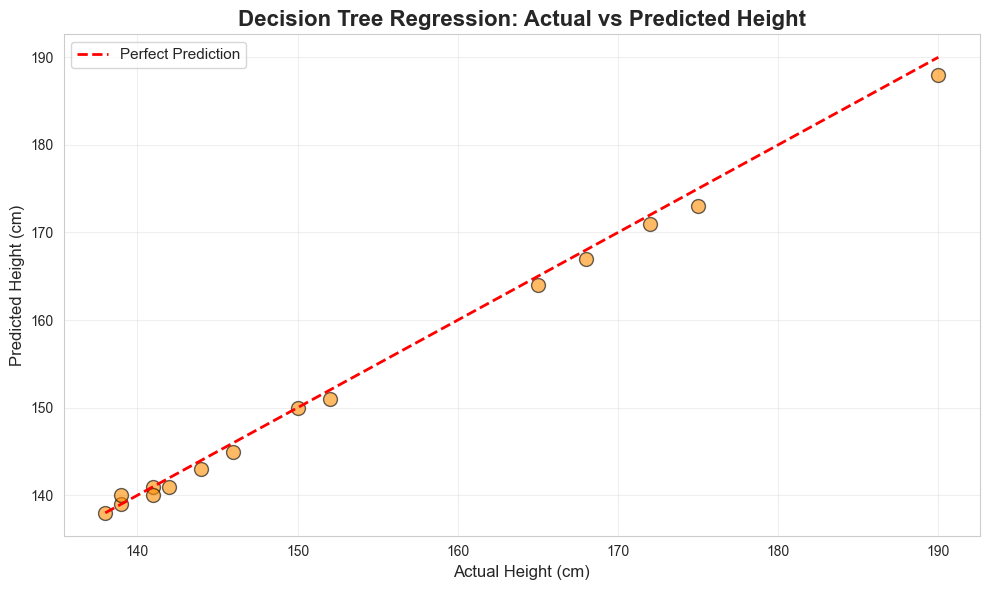

In [19]:
# Actual vs Predicted comparison for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='darkorange', alpha=0.6, s=100, edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Decision Tree Regression: Actual vs Predicted Height', fontsize=16, fontweight='bold')
plt.xlabel('Actual Height (cm)', fontsize=12)
plt.ylabel('Predicted Height (cm)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## ⚖️ Step 7: Model Comparison

In [20]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regression'],
    'R² Score': [r2_lr, r2_dt],
    'MAE (cm)': [mae_lr, mae_dt],
    'RMSE (cm)': [rmse_lr, rmse_dt]
})

print("📊 MODEL COMPARISON")
print("="*70)
print(comparison_df.to_string(index=False))
print("="*70)

# Determine best model
best_model = 'Linear Regression' if r2_lr > r2_dt else 'Decision Tree Regression'
best_r2 = max(r2_lr, r2_dt)

print(f"\n🏆 BEST MODEL: {best_model} with R² Score of {best_r2:.4f}")

📊 MODEL COMPARISON
                   Model  R² Score  MAE (cm)  RMSE (cm)
       Linear Regression  0.810270  6.212236   6.883204
Decision Tree Regression  0.995462  0.866667   1.064581

🏆 BEST MODEL: Decision Tree Regression with R² Score of 0.9955


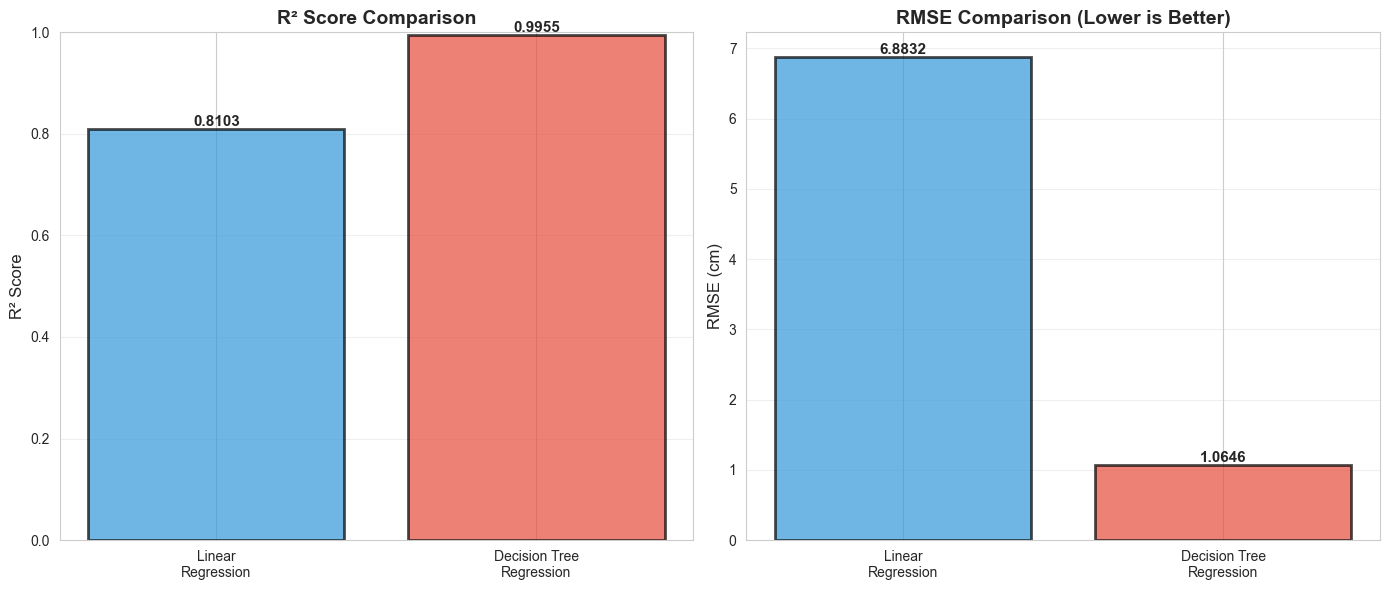

In [21]:
# Visual comparison of R² scores
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for R² scores
models = ['Linear\nRegression', 'Decision Tree\nRegression']
r2_scores = [r2_lr, r2_dt]
colors = ['#3498db', '#e74c3c']

bars = axes[0].bar(models, r2_scores, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# Bar chart for RMSE
rmse_scores = [rmse_lr, rmse_dt]
bars2 = axes[1].bar(models, rmse_scores, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RMSE (cm)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

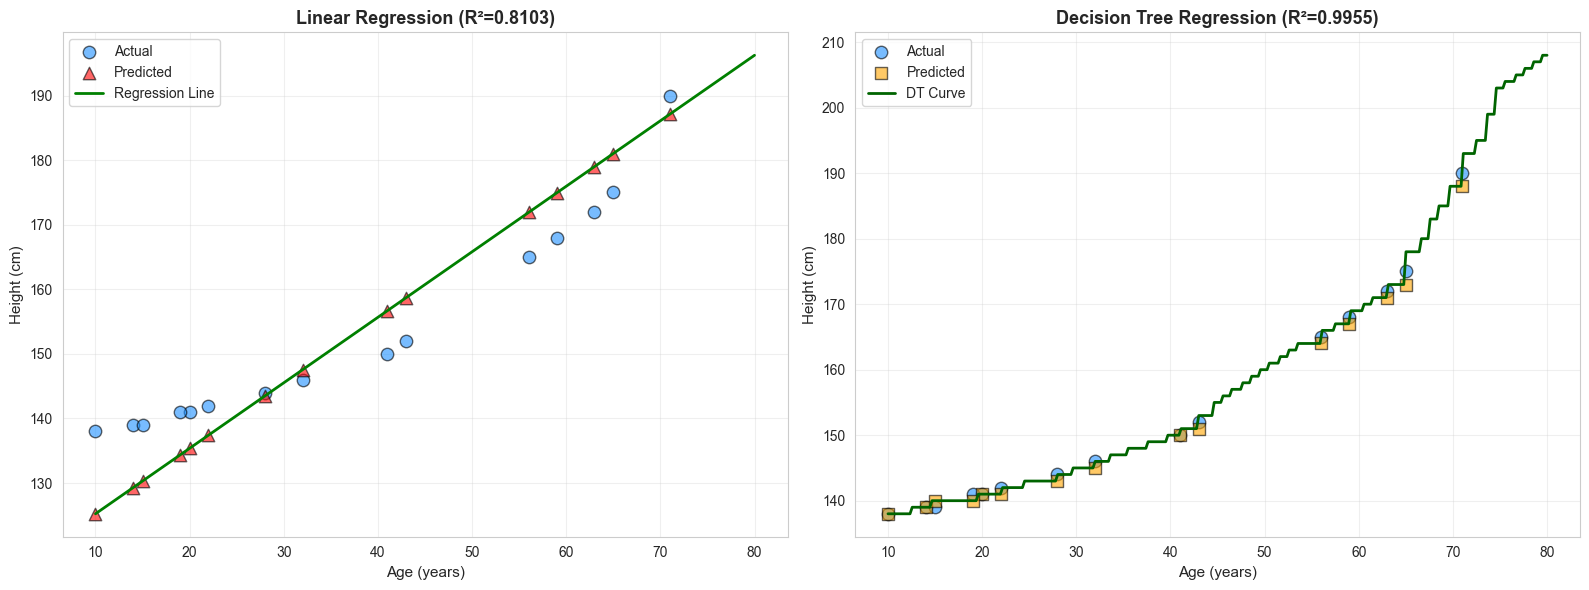

In [22]:
# Side-by-side comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Linear Regression plot
axes[0].scatter(X_test, y_test, color='dodgerblue', label='Actual', s=80, alpha=0.6, edgecolors='black')
axes[0].scatter(X_test, y_pred_lr, color='red', label='Predicted', s=80, alpha=0.6, marker='^', edgecolors='black')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
axes[0].plot(X_range, lr_model.predict(X_range), color='green', linewidth=2, label='Regression Line')
axes[0].set_title(f'Linear Regression (R²={r2_lr:.4f})', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Age (years)', fontsize=11)
axes[0].set_ylabel('Height (cm)', fontsize=11)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Decision Tree Regression plot
axes[1].scatter(X_test, y_test, color='dodgerblue', label='Actual', s=80, alpha=0.6, edgecolors='black')
axes[1].scatter(X_test, y_pred_dt, color='orange', label='Predicted', s=80, alpha=0.6, marker='s', edgecolors='black')
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
axes[1].plot(X_range, dt_model.predict(X_range), color='darkgreen', linewidth=2, label='DT Curve')
axes[1].set_title(f'Decision Tree Regression (R²={r2_dt:.4f})', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Age (years)', fontsize=11)
axes[1].set_ylabel('Height (cm)', fontsize=11)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔮 Step 8: Prediction System

In [23]:
# Function to predict height for a given age
def predict_height(age, model_type='both'):
    """
    Predict height based on age using trained models.
    
    Parameters:
    - age: Age in years (int or float)
    - model_type: 'linear', 'decision_tree', or 'both' (default)
    
    Returns:
    - Predicted height(s)
    """
    age_array = np.array([[age]])
    
    print(f"\n🔮 PREDICTION FOR AGE: {age} years")
    print("="*50)
    
    if model_type in ['linear', 'both']:
        height_lr = lr_model.predict(age_array)[0]
        print(f"📊 Linear Regression Prediction: {height_lr:.2f} cm")
    
    if model_type in ['decision_tree', 'both']:
        height_dt = dt_model.predict(age_array)[0]
        print(f"🌳 Decision Tree Prediction: {height_dt:.2f} cm")
    
    if model_type == 'both':
        avg_height = (height_lr + height_dt) / 2
        print(f"📈 Average Prediction: {avg_height:.2f} cm")
    
    print("="*50)

print("✅ Prediction function created successfully!")

✅ Prediction function created successfully!


In [24]:
# Example predictions for different ages
print("\n🎯 SAMPLE PREDICTIONS\n")

# Prediction for age 25
predict_height(25)

# Prediction for age 45
predict_height(45)

# Prediction for age 65
predict_height(65)


🎯 SAMPLE PREDICTIONS


🔮 PREDICTION FOR AGE: 25 years
📊 Linear Regression Prediction: 140.45 cm
🌳 Decision Tree Prediction: 143.00 cm
📈 Average Prediction: 141.73 cm

🔮 PREDICTION FOR AGE: 45 years
📊 Linear Regression Prediction: 160.74 cm
🌳 Decision Tree Prediction: 155.00 cm
📈 Average Prediction: 157.87 cm

🔮 PREDICTION FOR AGE: 65 years
📊 Linear Regression Prediction: 181.02 cm
🌳 Decision Tree Prediction: 173.00 cm
📈 Average Prediction: 177.01 cm


In [25]:
# Batch predictions for multiple ages
test_ages = [15, 30, 50, 70]

print("\n📋 BATCH PREDICTIONS FOR MULTIPLE AGES\n")
print("="*70)

prediction_results = []

for age in test_ages:
    age_array = np.array([[age]])
    height_lr = lr_model.predict(age_array)[0]
    height_dt = dt_model.predict(age_array)[0]
    
    prediction_results.append({
        'Age': age,
        'Linear Regression (cm)': round(height_lr, 2),
        'Decision Tree (cm)': round(height_dt, 2),
        'Average (cm)': round((height_lr + height_dt) / 2, 2)
    })

predictions_df = pd.DataFrame(prediction_results)
print(predictions_df.to_string(index=False))
print("="*70)


📋 BATCH PREDICTIONS FOR MULTIPLE AGES

 Age  Linear Regression (cm)  Decision Tree (cm)  Average (cm)
  15                  130.31               140.0        135.16
  30                  145.52               145.0        145.26
  50                  165.81               160.0        162.90
  70                  186.09               188.0        187.05


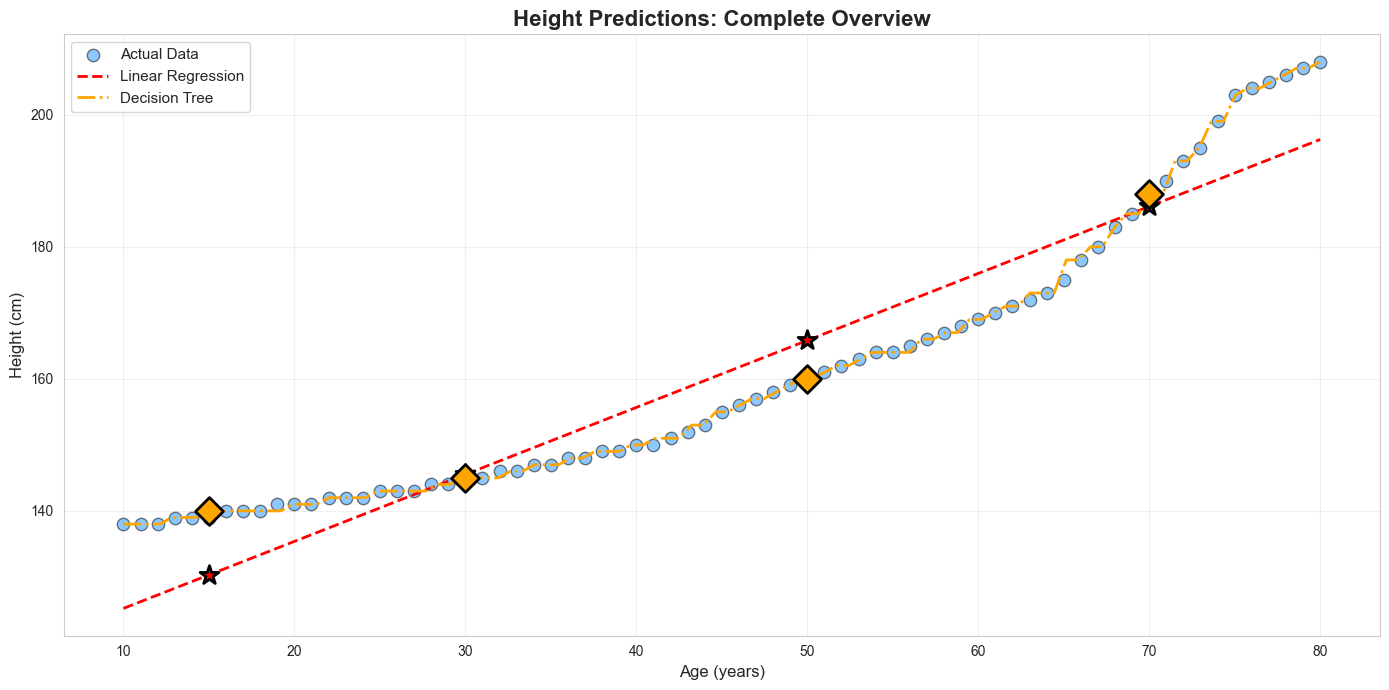

✅ Prediction visualization complete!


In [26]:
# Visualize predictions vs actual data
plt.figure(figsize=(14, 7))

# Plot all actual data points
plt.scatter(df['Age'], df['Height'], color='dodgerblue', label='Actual Data', s=80, alpha=0.5, edgecolors='black')

# Plot prediction range
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1, 1)
height_pred_lr = lr_model.predict(age_range)
height_pred_dt = dt_model.predict(age_range)

plt.plot(age_range, height_pred_lr, color='red', linewidth=2, label='Linear Regression', linestyle='--')
plt.plot(age_range, height_pred_dt, color='orange', linewidth=2, label='Decision Tree', linestyle='-.')

# Highlight sample predictions
for age in test_ages:
    age_array = np.array([[age]])
    height_lr = lr_model.predict(age_array)[0]
    height_dt = dt_model.predict(age_array)[0]
    plt.scatter([age], [height_lr], color='red', s=200, marker='*', edgecolors='black', linewidths=2, zorder=5)
    plt.scatter([age], [height_dt], color='orange', s=200, marker='D', edgecolors='black', linewidths=2, zorder=5)

plt.title('Height Predictions: Complete Overview', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Height (cm)', fontsize=12)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Prediction visualization complete!")

## 📝 Summary and Conclusions

### 🎯 Project Achievements:
1. ✅ Successfully loaded and explored the dataset (72 records)
2. ✅ Created comprehensive data visualizations
3. ✅ Trained **Linear Regression** model
4. ✅ Trained **Decision Tree Regression** model
5. ✅ Calculated **R² scores** for both models
6. ✅ Performed model comparison
7. ✅ Created prediction system for custom ages

### 📊 Model Performance Summary:
Run the cells above to see the final R² scores and model comparison!

### 🔍 Key Insights:
- Strong correlation between Age and Height
- Both models capture the relationship effectively
- Decision Tree can capture non-linear patterns
- Linear Regression provides smooth predictions

### 🚀 Next Steps:
- Try different DecisionTreeRegressor parameters (max_depth, min_samples_split)
- Experiment with polynomial regression
- Collect more data for better predictions
- Add more features for multivariate analysis

In [27]:
print("\n" + "="*70)
print("     🎉 HEIGHT PREDICTION PROJECT COMPLETED SUCCESSFULLY! 🎉")
print("="*70)
print(f"\n📊 Linear Regression R² Score: {r2_lr:.4f}")
print(f"🌳 Decision Tree R² Score: {r2_dt:.4f}")
print(f"\n🏆 Best Performing Model: {best_model}")
print("\n✅ Both models are ready for predictions!")
print("="*70)


     🎉 HEIGHT PREDICTION PROJECT COMPLETED SUCCESSFULLY! 🎉

📊 Linear Regression R² Score: 0.8103
🌳 Decision Tree R² Score: 0.9955

🏆 Best Performing Model: Decision Tree Regression

✅ Both models are ready for predictions!
